# 1. 라이브러리 불러오기

In [1]:
import pandas as pd
from collections import Counter
import seaborn as sns

# 2. 데이터 불러오기

In [2]:
# df_in 데이터셋 생성
df_in = pd.read_csv('./Data_OTT_update/inventory_interest_final.csv', encoding = 'euc-kr', index_col = 0)
df_in.head()

,item_id,contract_year,movie_id,title,price,release_year,runtime,mpa_rating,imdb_score,votes,...,Genre_3,actor_1,actor_2,actor_3,contract_price,studio_score,price_class,total_price,total_dollar,interest
62,I-1063,2016,tt2452042,The Peanuts Movie,5000,2015,88,G,7.1,39900,...,Family,Trombone Shorty,Rebecca Bloom,Anastasia Bredikhina,2195,6,1,17995000,15841,13646
60,I-1061,2016,tt3659388,The Martian,4500,2015,144,PG-13,8.0,701756,...,Sci-Fi,Matt Damon,Jessica Chastain,Kristen Wiig,2600,6,10,16344000,14387,11787
58,I-1059,2016,tt1398426,Straight Outta Compton,4500,2015,147,R,7.9,168582,...,History,O'Shea Jackson Jr.,Corey Hawkins,Jason Mitchell,2600,6,10,15975000,14062,11462
61,I-1062,2016,tt2379713,Spectre,4000,2015,148,PG-13,6.8,359445,...,Thriller,Daniel Craig,Christoph Waltz,L占쏙옙a Seydoux,2295,10,1,14644000,12891,10596
59,I-1060,2016,tt2510894,Hotel Transylvania 2,4000,2015,89,PG,6.7,96526,...,Family,Adam Sandler,Andy Samberg,Selena Gomez,2295,10,1,14432000,12704,10409


In [3]:
# df_cus 데이터셋 생성
df_cus = pd.read_csv('./Data_OTT_update/movie_custom_final.csv', encoding = 'utf-8', index_col = 0)
df_cus.head()

,customer_id,gender,age,age_group,married,kids_under12,area,subs_start_year,download_count,total_price,class
0,C5001,F,51,50대,M,N,용산구,2015,55,262000.0,Platinum
1,C5002,M,22,20대,S,N,강남구,2015,23,102200.0,Silver
2,C5003,F,33,30대,M,Y,서대문구,2015,55,270800.0,Platinum
3,C5004,F,24,20대,M,N,서대문구,2015,41,200400.0,Gold
4,C5005,F,35,30대,M,N,마포구,2015,34,165900.0,Gold


In [4]:
# df_down 데이터셋 생성
df_down = pd.read_csv('./Data_OTT/download_month.csv', encoding = 'euc-kr')
df_down.head()

,Unnamed: 0,customer_id,item_id,down_date,down_year,down_month,down_weekday,season
0,0,C5001,I-1038,2015-01-08,2015,Jan,Thu,winter
1,1,C5001,I-1003,2015-01-17,2015,Jan,Sat,winter
2,2,C5001,I-1017,2015-01-17,2015,Jan,Sat,winter
3,3,C5001,I-1028,2015-01-19,2015,Jan,Mon,winter
4,4,C5001,I-1036,2015-01-20,2015,Jan,Tue,winter


In [5]:
# df_di 데이터셋 생성
df_di = pd.read_csv('./Data_OTT_update/download_inventory_final.csv', encoding = 'utf-8')
df_di.head()

,Unnamed: 0,customer_id,item_id,movie_id,down_year,down_month,down_weekday,season,title,release_year,...,Genre_1,Genre_2,Genre_3,actor_1,actor_2,actor_3,contract_price,studio_score,price_class,price
0,0,C5001,I-1038,tt1951264,2015,Jan,Thu,winter,The Hunger Games: Catching Fire,2013,...,Action,Adventure,Mystery,Jennifer Lawrence,Liam Hemsworth,Jack Quaid,2600,6,10,1000.0
1,1,C5011,I-1038,tt1951264,2015,Mar,Fri,spring,The Hunger Games: Catching Fire,2013,...,Action,Adventure,Mystery,Jennifer Lawrence,Liam Hemsworth,Jack Quaid,2600,6,10,1000.0
2,2,C5024,I-1038,tt1951264,2015,Aug,Wed,summer,The Hunger Games: Catching Fire,2013,...,Action,Adventure,Mystery,Jennifer Lawrence,Liam Hemsworth,Jack Quaid,2600,6,10,1000.0
3,3,C5027,I-1038,tt1951264,2015,May,Mon,spring,The Hunger Games: Catching Fire,2013,...,Action,Adventure,Mystery,Jennifer Lawrence,Liam Hemsworth,Jack Quaid,2600,6,10,1000.0
4,4,C5035,I-1038,tt1951264,2015,Aug,Wed,summer,The Hunger Games: Catching Fire,2013,...,Action,Adventure,Mystery,Jennifer Lawrence,Liam Hemsworth,Jack Quaid,2600,6,10,1000.0


# 3. 고객의 선호 장르를 고객 데이터에 추가

### 1) 선호 장르를 찾는 함수 생성

In [6]:
# 고객의 선호 장르를 찾는 함수 생성
def find_genre(Genre1, Genre2, Genre3):
    m = 0
    u_keys = [] 
    genre = Counter(Genre1) + Counter(Genre2) + Counter(Genre3)
    for key, value in genre.items():
        if value > m:
            first = key
            m = value

    genre[first] = 0
    m = 0
    for key, value in genre.items():
        if value > m:
            second = key
            m = value

    return first, second  # 고객의 선호 장르(가장 많이 본 장르) 반환

In [7]:
# 장르가 일치하는 데이터만 남기는 함수 생성
def genre(user_name, df_raw):#, df_all):
    Genre1 = df_raw[df_raw['customer_id'] == user_name]['Genre_1']
    Genre2 = df_raw[df_raw['customer_id'] == user_name]['Genre_2']
    Genre3 = df_raw[df_raw['customer_id'] == user_name]['Genre_3']
    f, s = find_genre(Genre1, Genre2, Genre3)

    return f, s

### 2) 고객 id를 넣어 결과를 확인

In [8]:
genre('C5001', df_di)

('Adventure', 'Action')

In [9]:
genre('C6678', df_di)

('Adventure', 'Action')

In [10]:
genre('C6786', df_di)

('Adventure', 'Comedy')

In [11]:
genre('C8111', df_di)

('Adventure', 'Action')

In [12]:
genre('C7777', df_di)

('Adventure', 'Action')

In [13]:
genre('C7896', df_di)

('Action', 'Adventure')

### 3) 고객의 가장 선호하는 장르와 두번째로 선호하는 장르를 각각 리스트에 저장

In [14]:
genre_first = []
genre_second = []

for id in df_cus['customer_id']:
    first, second = genre(id, df_di)
    genre_first.append(first)
    genre_second.append(second)
    
len(genre_first)

3277

### 4) 고객이 첫번째로 좋아하는 장르와 두번째로 선호하는 장르를 데이터셋에 추가

In [15]:
# 'genre_first', 'genre_second' 열 생성
df_cus['genre_first'] = genre_first
df_cus['genre_second'] = genre_second

In [16]:
# 결과 확인
df_cus

,customer_id,gender,age,age_group,married,kids_under12,area,subs_start_year,download_count,total_price,class,genre_first,genre_second
0,C5001,F,51,50대,M,N,용산구,2015,55,262000.0,Platinum,Adventure,Action
1,C5002,M,22,20대,S,N,강남구,2015,23,102200.0,Silver,Adventure,Action
2,C5003,F,33,30대,M,Y,서대문구,2015,55,270800.0,Platinum,Adventure,Action
3,C5004,F,24,20대,M,N,서대문구,2015,41,200400.0,Gold,Adventure,Action
4,C5005,F,35,30대,M,N,마포구,2015,34,165900.0,Gold,Adventure,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,C8273,F,43,40대,M,N,마포구,2018,8,37000.0,Bronze,Action,Adventure
3273,C8274,F,24,20대,M,N,송파구,2018,10,48700.0,Bronze,Adventure,ETC
3274,C8275,F,55,50대,S,N,강남구,2018,9,44500.0,Bronze,Action,Adventure
3275,C8276,F,36,30대,S,Y,서대문구,2018,17,77500.0,Bronze,Adventure,Action


In [17]:
# 변경된 데이터셋을 csv파일로 저장
df_cus.to_csv('./customer_genre.csv', encoding = 'euc-kr')

# 4. 고객들의 장르 선호도 총합

### 1) 고객들의 장르 선호도 총합

In [18]:
# 고객들이 첫번째로 좋아하는 장르 선호도의 총합
df_cus['genre_first'].value_counts()

Adventure    3003
Action        222
Comedy         35
ETC             8
Animation       7
Drama           1
Horror          1
Name: genre_first, dtype: int64

고객들이 대부분 Adventure와 Action 장르를 많이 선호하는 것을 알 수 있다.

In [19]:
# 고객들이 두번째로 좋아하는 장르 선호도의 총합
df_cus['genre_second'].value_counts()

Action       2568
Comedy        380
Adventure     242
Animation      53
ETC            18
Drama          11
Sci-Fi          3
Biography       1
Family          1
Name: genre_second, dtype: int64

고객들이 두번째로 좋아하는 장르가 Action, Comedy 인 것을 알 수 있다.

### 2) 연령대와 장르 선호도의 관계

In [20]:
# 연령대와 장르 선호도 관계 확인
df1 = pd.crosstab(df_cus.age_group, df_cus.genre_first)
df1

genre_first,Action,Adventure,Animation,Comedy,Drama,ETC,Horror
age_group,,,,,,,
10대,6,40,0,2,0,0,0
20대,70,877,1,16,0,1,0
30대,62,807,0,7,0,4,0
40대,40,698,3,6,1,0,1
50대,38,500,3,3,0,3,0
60대,6,81,0,1,0,0,0


In [21]:
# 표준화를 적용
for i in df1.index:
    df1.loc[i] = df1.loc[i] / df1.loc[i].sum()
df1

genre_first,Action,Adventure,Animation,Comedy,Drama,ETC,Horror
age_group,,,,,,,
10대,0.125000,0.833333,0.000000,0.041667,0.000000,0.000000,0.000000
20대,0.072539,0.908808,0.001036,0.016580,0.000000,0.001036,0.000000
30대,0.070455,0.917045,0.000000,0.007955,0.000000,0.004545,0.000000
40대,0.053405,0.931909,0.004005,0.008011,0.001335,0.000000,0.001335
50대,0.069470,0.914077,0.005484,0.005484,0.000000,0.005484,0.000000
60대,0.068182,0.920455,0.000000,0.011364,0.000000,0.000000,0.000000


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:xlabel='genre_first', ylabel='age_group'>

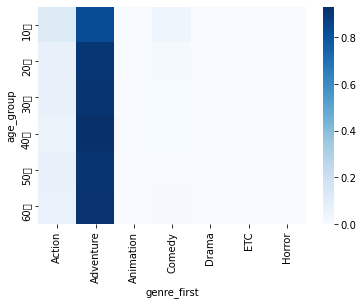

In [22]:
# heat map 그래프로 시각화
sns.heatmap(df1, cmap='Blues')

연령대별로 전부 adventure 장르를 대부분 선호하는 것을 알 수 있다.

<AxesSubplot:xlabel='age_group,genre_first'>

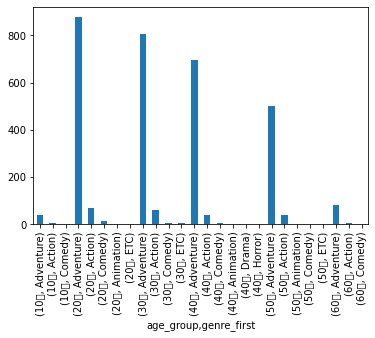

In [23]:
# 막대 그래프로 시각화
df_cus.groupby(['age_group'])['genre_first'].value_counts().plot.bar()

막대 그래프로 시각화 시켰으나 알아보기가 힘든 것을 알 수 있다.

/home/piai/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_group', ylabel='count'>

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)


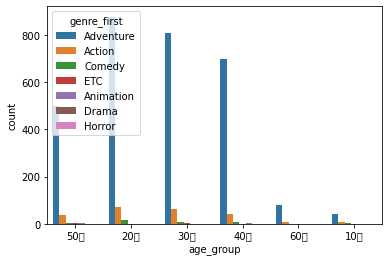

In [24]:
# 막대 그래프를 알아보기 쉽도록 변환
sns.countplot('age_group',hue='genre_first',data=df_cus[['age_group','genre_first']])

역시 연령대별로 전부 adventure 장르를 가장 선호하는 것을 알 수 있다.

### 3) 계절과 장르 선호도의 관계

#### (1) 고객이 다운로드한 영화들의 장르 수와 계절의 관계

In [25]:
# df_di 데이터셋 확인
print(df_di.shape)
df_di.head()

(116464, 33)


,Unnamed: 0,customer_id,item_id,movie_id,down_year,down_month,down_weekday,season,title,release_year,...,Genre_1,Genre_2,Genre_3,actor_1,actor_2,actor_3,contract_price,studio_score,price_class,price
0,0,C5001,I-1038,tt1951264,2015,Jan,Thu,winter,The Hunger Games: Catching Fire,2013,...,Action,Adventure,Mystery,Jennifer Lawrence,Liam Hemsworth,Jack Quaid,2600,6,10,1000.0
1,1,C5011,I-1038,tt1951264,2015,Mar,Fri,spring,The Hunger Games: Catching Fire,2013,...,Action,Adventure,Mystery,Jennifer Lawrence,Liam Hemsworth,Jack Quaid,2600,6,10,1000.0
2,2,C5024,I-1038,tt1951264,2015,Aug,Wed,summer,The Hunger Games: Catching Fire,2013,...,Action,Adventure,Mystery,Jennifer Lawrence,Liam Hemsworth,Jack Quaid,2600,6,10,1000.0
3,3,C5027,I-1038,tt1951264,2015,May,Mon,spring,The Hunger Games: Catching Fire,2013,...,Action,Adventure,Mystery,Jennifer Lawrence,Liam Hemsworth,Jack Quaid,2600,6,10,1000.0
4,4,C5035,I-1038,tt1951264,2015,Aug,Wed,summer,The Hunger Games: Catching Fire,2013,...,Action,Adventure,Mystery,Jennifer Lawrence,Liam Hemsworth,Jack Quaid,2600,6,10,1000.0


In [26]:
# 'customer_id', 'season' 변수만 추출
df2 = df_di[['customer_id', 'season']]
df2.head()

,customer_id,season
0,C5001,winter
1,C5011,spring
2,C5024,summer
3,C5027,spring
4,C5035,summer


In [27]:
# 'customer_id', 'genre_first', 'genre_second' 변수만 추출
df3 = df_cus[['customer_id','genre_first','genre_second']]
df3.head()

,customer_id,genre_first,genre_second
0,C5001,Adventure,Action
1,C5002,Adventure,Action
2,C5003,Adventure,Action
3,C5004,Adventure,Action
4,C5005,Adventure,Comedy


In [28]:
# 'customer_id'를 기준으로 두 데이터셋을 합침
df_season = pd.merge(df2, df3, on = ('customer_id'))

# 새 데이터셋 확인
df_season.head()

,customer_id,season,genre_first,genre_second
0,C5001,winter,Adventure,Action
1,C5001,summer,Adventure,Action
2,C5001,winter,Adventure,Action
3,C5001,summer,Adventure,Action
4,C5001,winter,Adventure,Action


In [29]:
# 계절이 겨울일 때 고객이 가장 선호하는 장르 확인
df_season[df_season['season'] == 'winter'][['genre_first']].value_counts()

genre_first
Adventure      27246
Action           954
Comedy           145
ETC               25
Animation         13
Horror             2
Drama              2
dtype: int64

겨울에는 Adventure 장르를 가장 많이 본 것을 확인

In [30]:
# 계절이 여름일 때 고객이 가장 선호하는 장르 확인
df_season[df_season['season'] == 'summer'][['genre_first']].value_counts()

genre_first
Adventure      28098
Action          1062
Comedy           137
ETC               24
Animation         18
Drama              5
Horror             3
dtype: int64

여름에도 Adventure 장르를 가장 많이 본 것을 확인

/home/piai/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='count'>

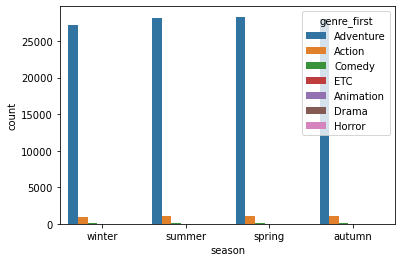

In [31]:
# 계절별 고객들의 장르 선호도 확인
sns.countplot('season',hue='genre_first',data=df_season[['season','genre_first']])

모든 계절마다 adventure 장르 선호도가 가장 높다.

계절별로 크게 차이가 나지 않는다.

/home/piai/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='count'>

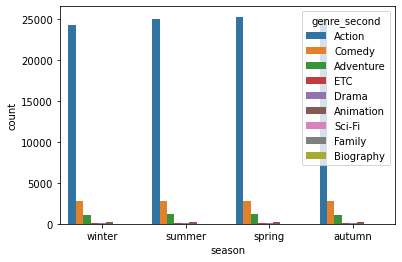

In [32]:
# 계절별 고객들이 두번째로 좋아하는 장르 선호도 확인
sns.countplot('season',hue='genre_second',data=df_season[['season','genre_second']])

모든 계절마다 action 장르 선호도가 높다.

역시 계절별로 거의 차이가 나지 않는다.

In [33]:
# 회사가 소유한 영화들의 장르 수 확인
counter = Counter(df_in['Genre_1']) + Counter(df_in['Genre_2']) + Counter(df_in['Genre_3'])
counter

Counter({'Animation': 23,
         'Adventure': 83,
         'Biography': 6,
         'Action': 61,
         'Comedy': 35,
         'Drama': 16,
         'Horror': 3,
         'Fantasy': 16,
         'Family': 11,
         'Music': 2,
         'Romance': 2,
         'ETC': 13,
         'Crime': 3,
         'Mystery': 2,
         'Thriller': 8,
         'Sci-Fi': 30,
         'History': 3,
         'Sport': 1})

회사가 소유한 영화들은 대부분 Adventure, Action 장르가 많은 것을 알 수 있다.

#### (2) (고객이 다운로드한 영화들의 장르 수) / (회사의 영화 장르 수) 와 계절의 관계

In [34]:
# (고객이 다운로드한 영화들의 장르 수를 회사의 영화 장르 수로 나누는 함수 생성 
def calculator(counter, genre_cnt):
    for i in genre_cnt.keys():
        i = list(i)[0]
        if counter[i] == 0:
            pass
        else:
            genre_cnt[i] /= counter[i]
    return genre_cnt

In [35]:
# 함수를 적용하여 계절이 봄일 떄 결과 확인
gen_spring = df_season[df_season['season'] == 'spring'][['genre_first']].value_counts()
gen_sp_w = calculator(counter, gen_spring)
gen_sp_w

genre_first
Adventure      341.433735
Action          16.754098
Comedy           4.142857
ETC              1.923077
Animation        0.826087
Drama            0.187500
Horror           0.333333
dtype: float64

Adventure 장르의 선호도가 가장 높다.

그 다음은 Action, Comedy 순

In [36]:
# 함수를 적용하여 계절이 여름일 떄 결과 확인
genre_summer = df_season[df_season['season'] == 'summer'][['genre_first']].value_counts()
gen_su_w = calculator(counter, genre_summer)
gen_su_w

genre_first
Adventure      338.530120
Action          17.409836
Comedy           3.914286
ETC              1.846154
Animation        0.782609
Drama            0.312500
Horror           1.000000
dtype: float64

Adventure 장르의 선호도가 가장 높다.

그 다음은 Action, Comedy 순

In [37]:
# 함수를 적용하여 계절이 가을일 떄 결과 확인
gen_autumn = df_season[df_season['season'] == 'autumn'][['genre_first']].value_counts()
gen_au_w = calculator(counter, gen_autumn)
gen_au_w

genre_first
Adventure      337.048193
Action          16.590164
Comedy           3.800000
ETC              2.384615
Animation        0.826087
Horror           1.333333
Drama            0.125000
dtype: float64

Adventure 장르의 선호도가 가장 높다.

그 다음은 Action, Comedy 순

In [38]:
# 함수를 적용하여 계절이 겨울일 떄 결과 확인
gen_winter = df_season[df_season['season'] == 'winter'][['genre_first']].value_counts()
gen_wi_w = calculator(counter, gen_winter)
gen_wi_w

genre_first
Adventure      328.265060
Action          15.639344
Comedy           4.142857
ETC              1.923077
Animation        0.565217
Horror           0.666667
Drama            0.125000
dtype: float64

Adventure 장르의 선호도가 가장 높다.

그 다음은 Action, Comedy 순

- **분석 결과 장르와 계절간의 상관성은 없다고 판단**

### 4) 성별과 장르 선호도의 관계

<AxesSubplot:xlabel='gender,genre_first'>

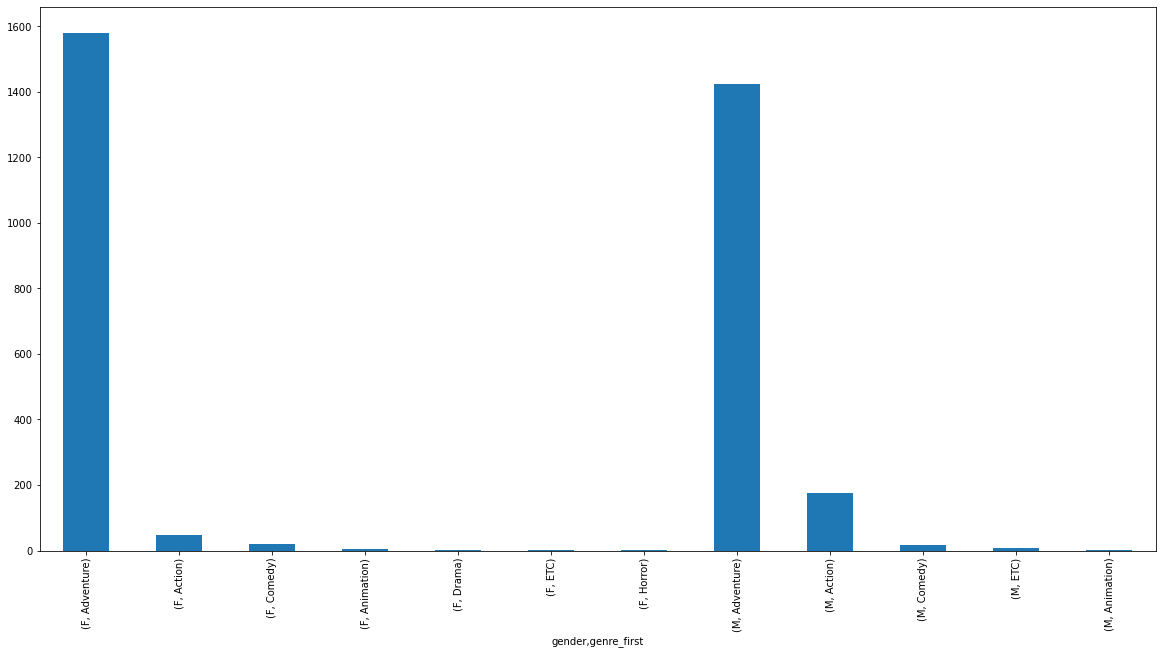

In [39]:
# 성별과 장르 선호도 관계 확인
df_cus.groupby(['gender'])['genre_first'].value_counts().plot.bar(figsize = (20, 10))

남녀 모두 adventure 장르를 가장 선호한다.

남자가 여자에 비해 action 장르를 더 많이 선호하는 것을 알 수 있다.

<AxesSubplot:xlabel='gender,genre_second'>

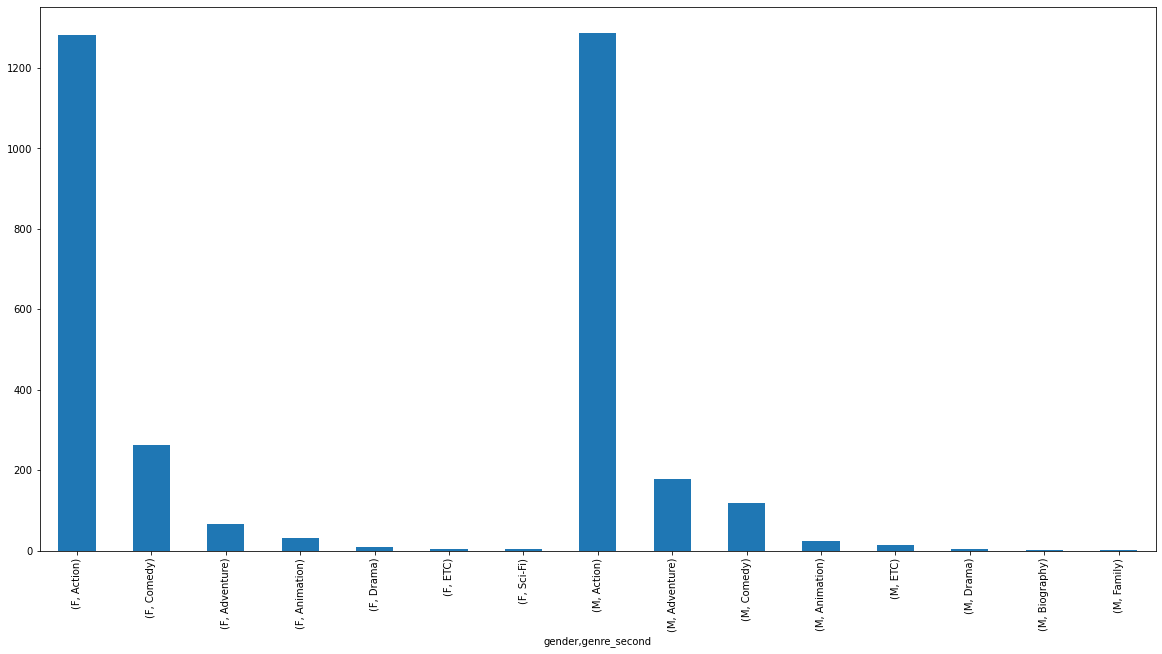

In [40]:
# 성별과 두번째로 선호하는 장르의 관계 확인
df_cus.groupby(['gender'])['genre_second'].value_counts().plot.bar(figsize = (20, 10))

남녀 모두 두번째로 선호하는 장르는 action 으로 같음

남자의 경우 action 다음 adventure, comedy 순

반면 여자의 경우 action 다음 comedy, adventure 순

- **분석 결과 남자가 여자에 비해 action 장르를 더 좋아한다는 것을 확인**

- **그러나 그 외에 다른 차이점은 보이지 않음**

### 5) 결혼 여부와 장르 선호도의 관계

<AxesSubplot:xlabel='married,genre_first'>

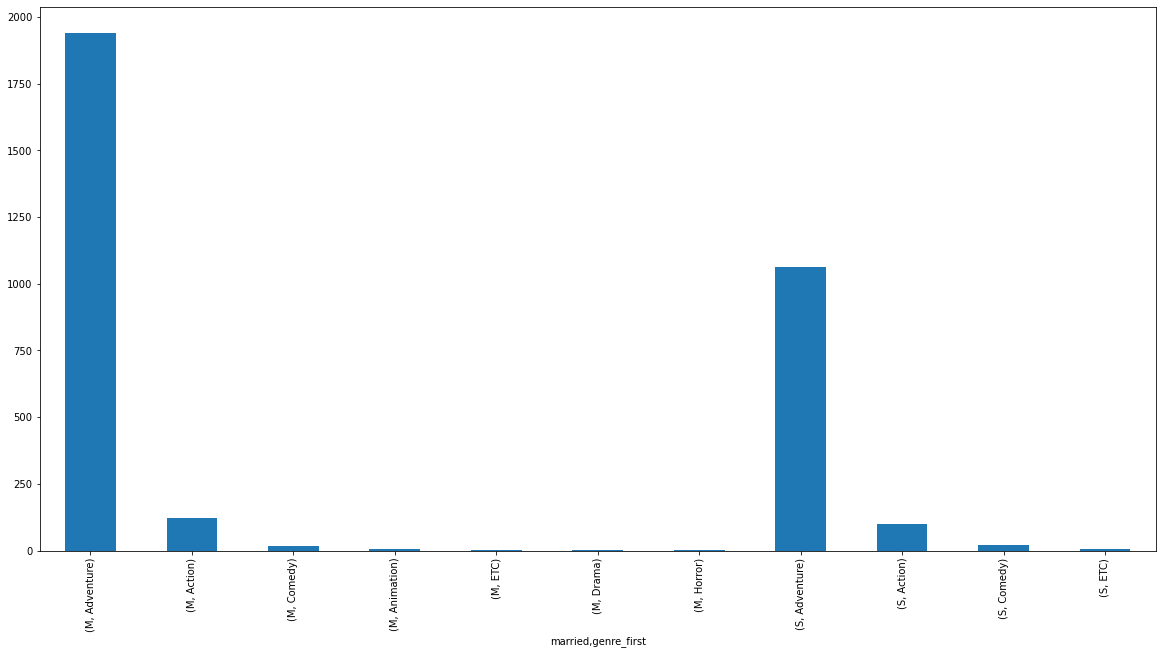

In [41]:
# 결혼 유무에 따른 장르 선호도 확인
df_cus.groupby(['married'])['genre_first'].value_counts().plot.bar(figsize = (20, 10))

- 결혼 유무에 상관없이 모두 adventure 장르를 선호

<AxesSubplot:xlabel='married,genre_second'>

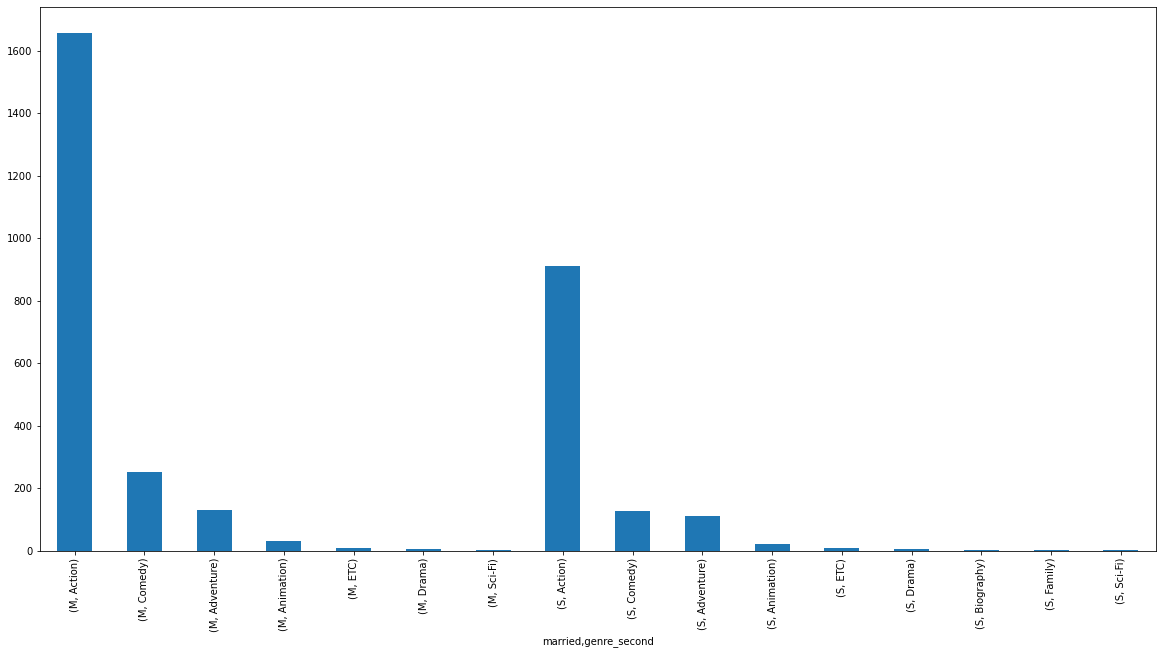

In [42]:
# 결혼 유무에 따른 두번째로 선호하는 장르 확인
df_cus.groupby(['married'])['genre_second'].value_counts().plot.bar(figsize = (20, 10))

결혼 유무에 상관없이 모두 action 장르를 두번째로 선호

# 5. 가중치를 고려한 고객들의 장르 선호도와 여러 변수들의 관계 확인

### 1) 가중치 고려한 장르 선호도 함수 생성

In [43]:
# (고객이 다운로드한 영화들의 장르 수) / (회사의 영화 장르 수) 계산 함수 생성
def weighted_calculator(counter, genre_cnt):
    for i in genre_cnt.keys():
        if counter[i] == 0:
            pass
        else:
            genre_cnt[i] /= counter[i]
    return genre_cnt

In [44]:
# 고객의 선호 장르를 찾는 함수 생성
def find_weighted_genre(Genre1, Genre2, Genre3, counter):
    m = 0
    u_keys = []
    genre = Counter(Genre1) + Counter(Genre2) + Counter(Genre3)
    genre_cnt = weighted_calculator(counter, genre)
    for key, value in genre_cnt.items():
        if value > m:
            first = key
            m = value

    genre[first] = 0
    m = 0
    for key, value in genre.items():
        if value > m:
            second = key
            m = value

    return first, second  # 고객의 선호 장르(가장 많이 본 장르) 반환



In [45]:
# 장르가 일치하는 데이터만 남기는 함수 생성
def weighted_genre(user_name, df_raw, counter):#, df_all):
    Genre1 = df_raw[df_raw['customer_id'] == user_name]['Genre_1']
    Genre2 = df_raw[df_raw['customer_id'] == user_name]['Genre_2']
    Genre3 = df_raw[df_raw['customer_id'] == user_name]['Genre_3']
    f, s = find_weighted_genre(Genre1, Genre2, Genre3, counter)

    return f, s

In [46]:
weighted_genre_first = []
weighted_genre_second = []

# 고객이 첫번째로 선호하는 장르와 두 번째로 선호하는 장르를 각각 리스트에 추가
for id in df_cus['customer_id']:
    first, second = weighted_genre(id, df_di,counter)
    weighted_genre_first.append(first)
    weighted_genre_second.append(second)

In [47]:
# df_cus 데이터에 가중치 고려한 고객이 첫번째로 선호하는 장르와 두 번째로 선호하는 장르 열 추가
df_cus['weighted_genre_first'] = weighted_genre_first
df_cus['weighted_genre_second'] = weighted_genre_second

In [48]:
# 변경된 데이터셋 확인
df_cus

,customer_id,gender,age,age_group,married,kids_under12,area,subs_start_year,download_count,total_price,class,genre_first,genre_second,weighted_genre_first,weighted_genre_second
0,C5001,F,51,50대,M,N,용산구,2015,55,262000.0,Platinum,Adventure,Action,Mystery,Crime
1,C5002,M,22,20대,S,N,강남구,2015,23,102200.0,Silver,Adventure,Action,Romance,Biography
2,C5003,F,33,30대,M,Y,서대문구,2015,55,270800.0,Platinum,Adventure,Action,Music,Crime
3,C5004,F,24,20대,M,N,서대문구,2015,41,200400.0,Gold,Adventure,Action,Sci-Fi,Romance
4,C5005,F,35,30대,M,N,마포구,2015,34,165900.0,Gold,Adventure,Comedy,Romance,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,C8273,F,43,40대,M,N,마포구,2018,8,37000.0,Bronze,Action,Adventure,Mystery,Thriller
3273,C8274,F,24,20대,M,N,송파구,2018,10,48700.0,Bronze,Adventure,ETC,Horror,Mystery
3274,C8275,F,55,50대,S,N,강남구,2018,9,44500.0,Bronze,Action,Adventure,Mystery,Horror
3275,C8276,F,36,30대,S,Y,서대문구,2018,17,77500.0,Bronze,Adventure,Action,Horror,ETC


In [49]:
# 가중치 고려한 고객이 가장 선호하는 장르의 개수 파악
df_cus['weighted_genre_first'].value_counts()

History      682
Romance      613
Crime        488
Sport        388
Music        246
Horror       215
ETC          165
Mystery      142
Family       120
Biography    101
Thriller      36
Fantasy       31
Animation     28
Comedy        10
Sci-Fi         8
Drama          4
Name: weighted_genre_first, dtype: int64

가중치를 고려한 결과 history 장르를 가장 선호하는 것을 확인

### 2) 계절과 가중치 고려한 장르 선호도의 관계

In [50]:
# 필요한 변수들만 추출한 새 데이터셋 생성
df3_1 = df_cus[['customer_id','weighted_genre_first','weighted_genre_second']]
df3_1.head()

,customer_id,weighted_genre_first,weighted_genre_second
0,C5001,Mystery,Crime
1,C5002,Romance,Biography
2,C5003,Music,Crime
3,C5004,Sci-Fi,Romance
4,C5005,Romance,Fantasy


In [51]:
# 두 데이터셋을 합쳐 새 데이터셋에 생성
df_season = pd.merge(df2, df3_1, on = ('customer_id'))

# df_season 데이터셋 확인
df_season.head()

,customer_id,season,weighted_genre_first,weighted_genre_second
0,C5001,winter,Mystery,Crime
1,C5001,summer,Mystery,Crime
2,C5001,winter,Mystery,Crime
3,C5001,summer,Mystery,Crime
4,C5001,winter,Mystery,Crime


In [54]:
# 계절이 겨울일 때 가중치 고려한 장르 선호도 확인
df_season[df_season['season'] == 'winter'][['weighted_genre_first']].value_counts()

weighted_genre_first
History                 6487
Sport                   5435
Romance                 4602
Crime                   4025
Music                   1637
ETC                     1603
Family                  1160
Horror                   892
Biography                858
Mystery                  819
Thriller                 290
Fantasy                  230
Animation                178
Sci-Fi                    80
Drama                     56
Comedy                    35
dtype: int64

겨울엔 History 장르가 가장 많은 것을 알 수 있다.

그 다음엔 Sport, Romance 순

In [57]:
# 계절이 여름일 때 가중치 고려한 장르 선호도 확인
df_season[df_season['season'] == 'summer'][['weighted_genre_first']].value_counts()

weighted_genre_first
History                 6751
Sport                   5657
Romance                 4799
Crime                   4187
Music                   1745
ETC                     1586
Family                  1140
Horror                   919
Biography                911
Mystery                  821
Thriller                 268
Fantasy                  217
Animation                188
Sci-Fi                    81
Drama                     40
Comedy                    37
dtype: int64

여름도 History 장르가 가장 많은 것을 알 수 있다.

그 다음은 Sport, Romance 순

/home/piai/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='count'>

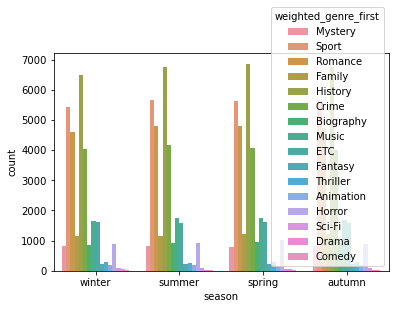

In [56]:
# 계절별 가중치 고려한 장르 선호도를 그래프로 시각화
sns.countplot('season',hue='weighted_genre_first',data=df_season[['season','weighted_genre_first']])

계절별로 장르 선호도에 큰 차이가 없는 것을 알 수 있다.

/home/piai/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='count'>

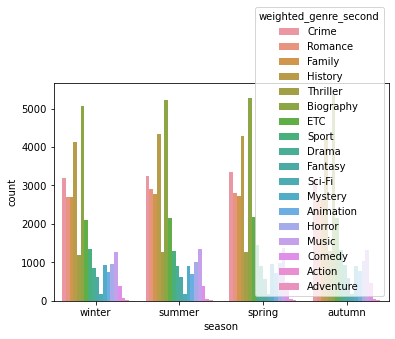

In [58]:
# 계절별 가중치 고려한 두번째 장르 선호도를 그래프로 시각화
sns.countplot('season',hue='weighted_genre_second',data=df_season[['season','weighted_genre_second']])

### 3) 연령대와 가중치 고려한 장르 선호도의 관계

In [59]:
# 연령대와 가중치 고려한 장르 선호도 관계 확인
df1_1 = pd.crosstab(df_cus.age_group, df_cus.weighted_genre_first)
df1_1

weighted_genre_first,Animation,Biography,Comedy,Crime,Drama,ETC,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller
age_group,,,,,,,,,,,,,,,,
10대,0,4,0,7,0,4,0,0,9,4,9,2,8,0,1,0
20대,7,44,6,134,1,44,39,8,214,68,99,55,212,3,23,8
30대,9,22,1,138,1,37,33,7,198,62,63,34,170,1,97,7
40대,6,15,1,94,2,39,29,7,163,43,40,20,104,3,176,7
50대,5,13,0,92,0,36,18,8,92,34,27,26,97,1,87,11
60대,1,3,2,23,0,5,1,1,6,4,8,5,22,0,4,3


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:xlabel='weighted_genre_first', ylabel='age_group'>

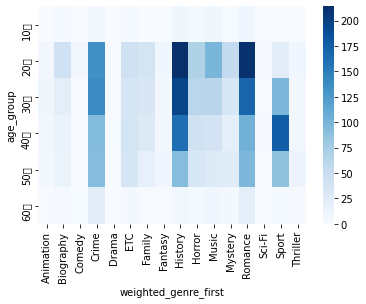

In [60]:
# heatmap을 통한 시각화
sns.heatmap(df1_1, cmap='Blues')

Crime, History, Romance, Sport 장르 쪽이 인기가 있다는 것을 확인할 수 있다.

<AxesSubplot:xlabel='age_group,weighted_genre_first'>

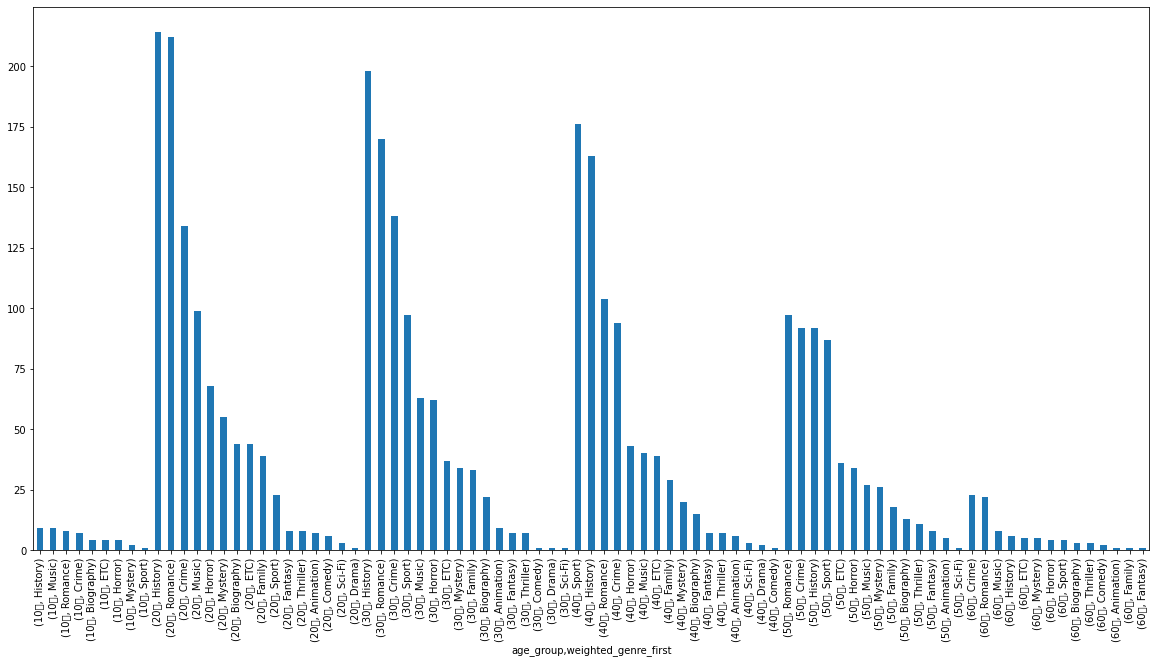

In [61]:
# 연령대별 가중치 고려한 장르 선호도 확인
df_cus.groupby(['age_group'])['weighted_genre_first'].value_counts().plot.bar(figsize = (20, 10))

가중치를 고려했을 때

10대, 20대, 30대 : History

40대 : Sport

50대 : Romance

60대 : Crime

장르를 가장 많이 선호하는 것을 알 수 있다.

<AxesSubplot:xlabel='age_group,weighted_genre_second'>

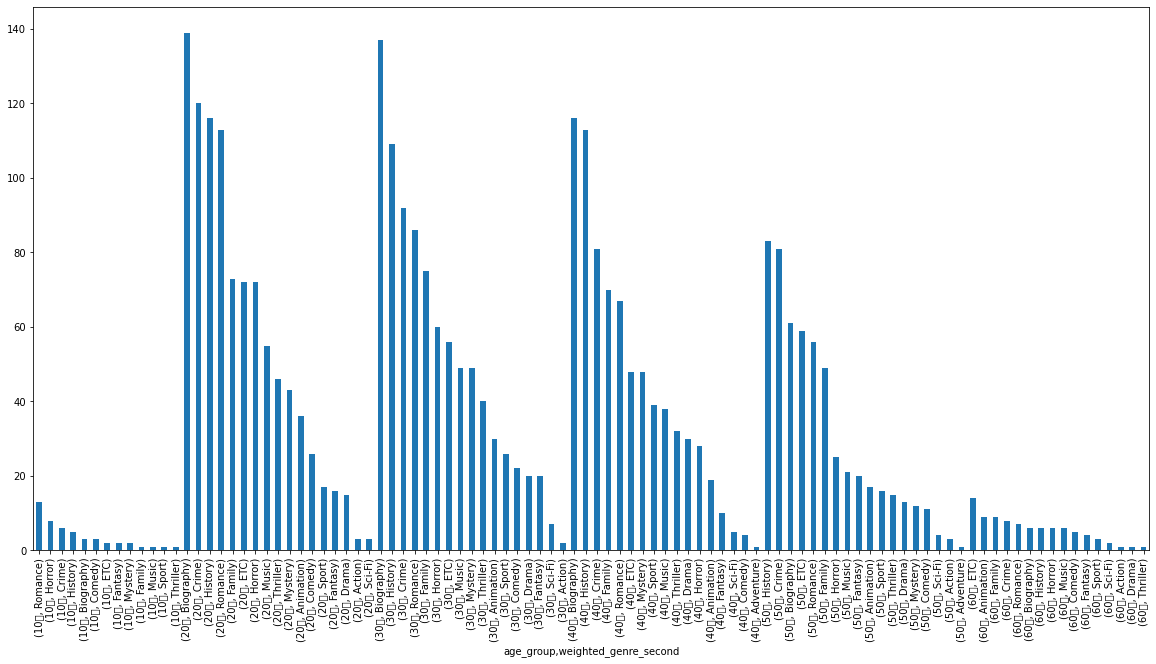

In [62]:
# 연령대별 가중치 고려한 두번째 장르 선호도 확인
df_cus.groupby(['age_group'])['weighted_genre_second'].value_counts().plot.bar(figsize = (20, 10))

가중치를 고려했을 때

10대 : Romance

20대, 30대, 40대 : Biography

50대 : History

장르를 두번째로 많이 선호하는 것을 알 수 있다.

### 4) 성별과 가중치 고려한 장르 선호도 관계

<AxesSubplot:xlabel='gender,weighted_genre_first'>

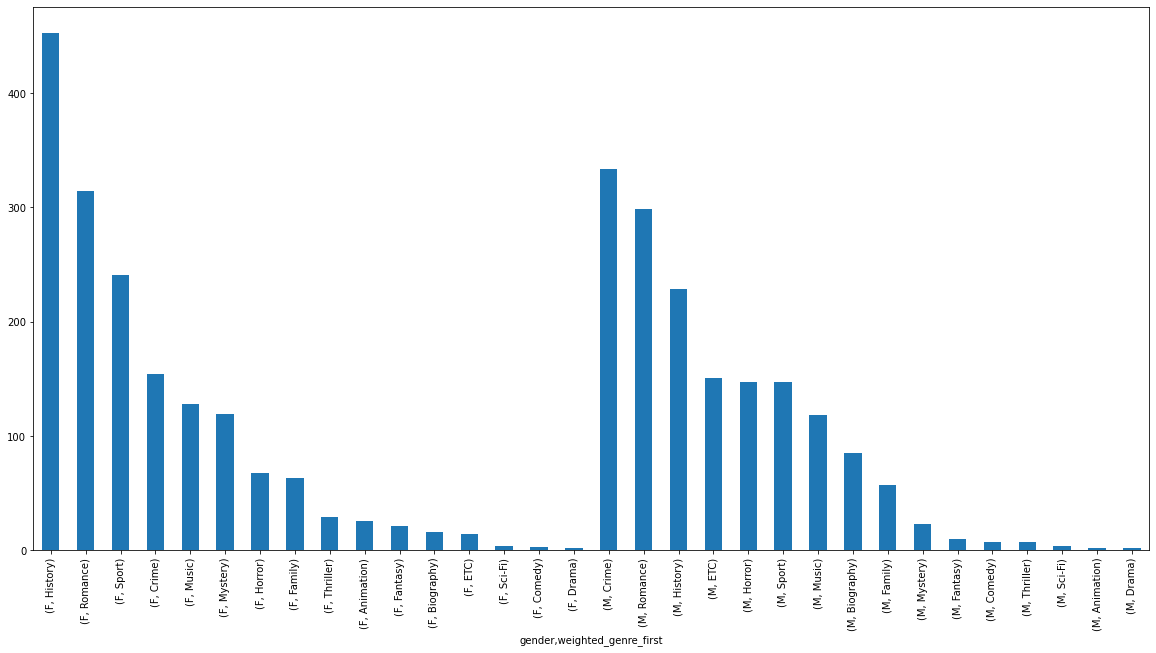

In [63]:
# 성별과 가중치 고려한 장르 선호도 관계 확인
df_cus.groupby(['gender'])['weighted_genre_first'].value_counts().plot.bar(figsize = (20, 10))

가중치를 고려했을 때 여자의 경우 History, 남자의 경우 Crime 장르를 가장 선호하는 것을 알 수 있다.

<AxesSubplot:xlabel='gender,weighted_genre_second'>

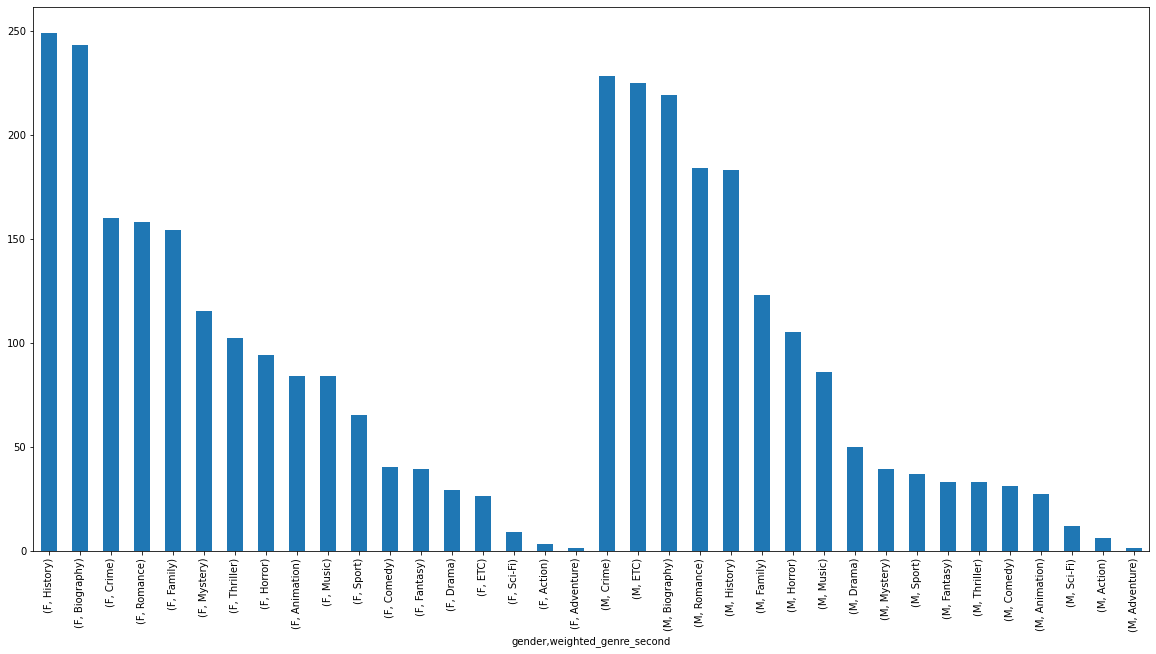

In [64]:
# 성별과 가중치 고려한 두번째 장르 선호도 관계 확인
df_cus.groupby(['gender'])['weighted_genre_second'].value_counts().plot.bar(figsize = (20, 10))

가중치를 고려했을 때 여자의 경우 History, 남자의 경우 Crime 장르를 두번째로 선호하는 것을 알 수 있다.